Step 1: Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load the dataset

In [2]:
data = pd.read_csv('titanic.csv')


Step 3: Preliminary exploration of the data

In [4]:
# Display the first few rows of the dataset
print(data.head())

# Summary statistics of numerical columns
print(data.describe())




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [5]:
# Check for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Data Cleaning

In [6]:
# Replace missing values in specific columns (e.g., Age, Cabin, Embarked)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop columns with excessive missing values or less relevance
data.drop('Cabin', axis=1, inplace=True)

# Verify changes
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Exploratory Data Analysis (EDA)

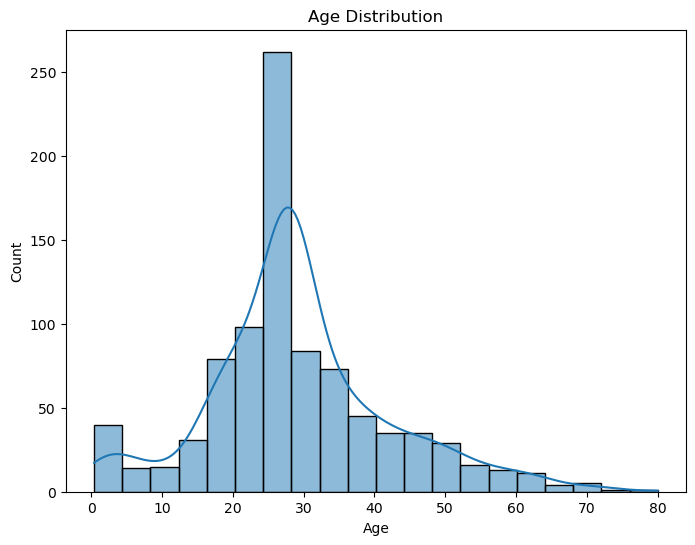

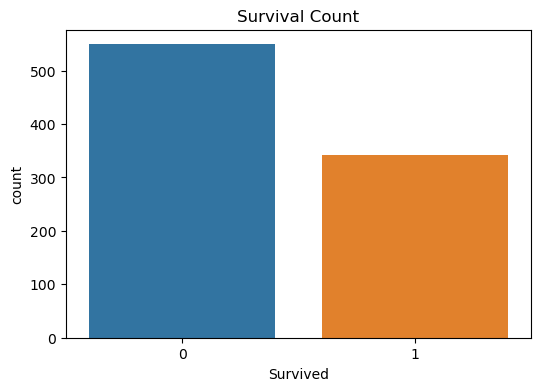

In [7]:
# Histogram of Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Countplot of Survived vs. Not Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()


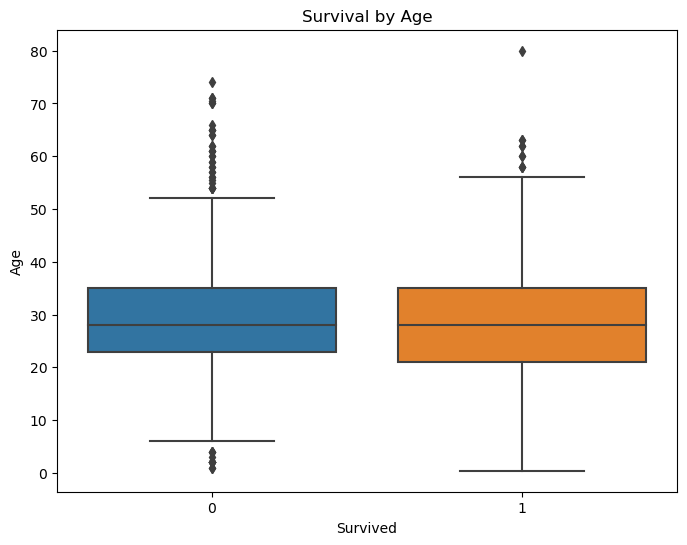

C:\Users\Petter\AppData\Local\Temp\ipykernel_13040\3313416606.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


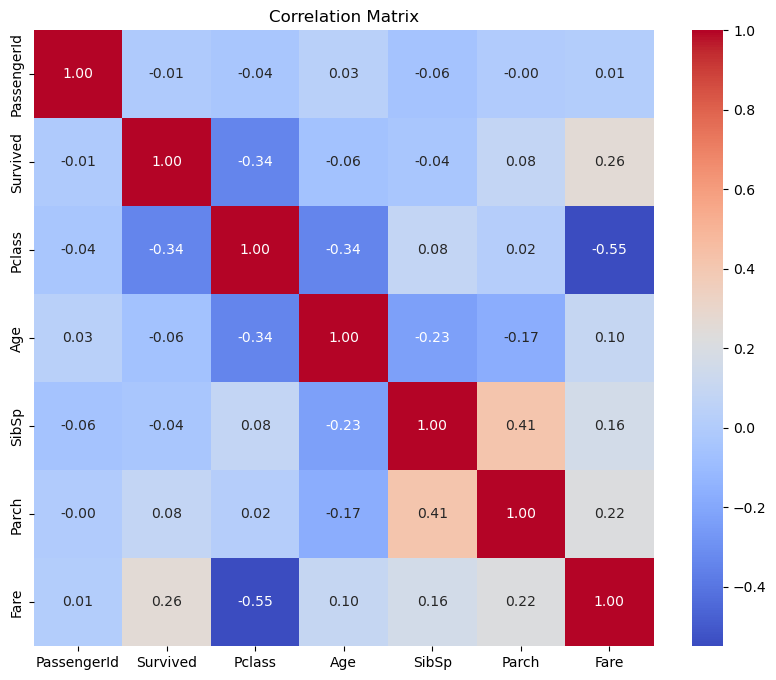

In [8]:
# Relationship between Age and Survived
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Survival by Age')
plt.show()

# Correlation matrix for numerical variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


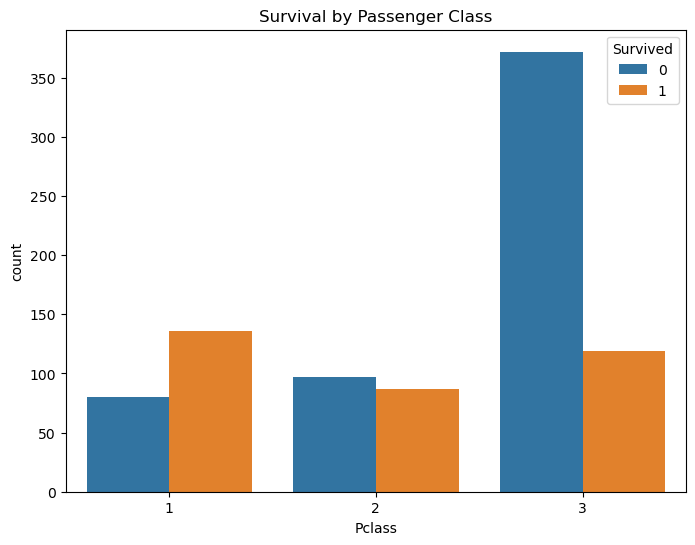

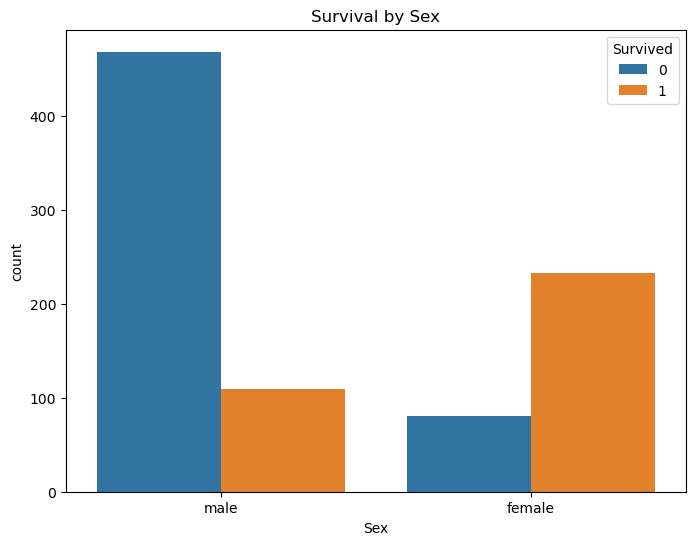

In [9]:
# Relationship between Pclass, Sex, and Survived
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Sex')
plt.show()
